# Sine Wave Generator

Implement a circuit that outputs a 8-bit digital sine wave signal on the IceStick's J3 header.

In [ ]:
import magma as m
m.set_mantle_target("ice40")
from loam.boards.icestick import IceStick

icestick = IceStick()

# TODO: Configure parts (clock, GPIO)

In [ ]:
main = icestick.main()
# TODO: Define main

In [ ]:
m.compile('build/sin', main)

In [ ]:
%%bash
cd build
cat sin.pcf
yosys -q -p 'synth_ice40 -top main -blif sin.blif' sin.v
arachne-pnr -q -d 1k -o sin.txt -p sin.pcf sin.blif 
icepack sin.txt sin.bin
iceprog sin.bin

We can wire up the GPIO pins to a logic analyzer to verify that our circuit produces the correct sine waveform.

![](images/sine.png)

We can use Saleae's [export data](https://support.saleae.com/hc/en-us/articles/115005986806-Saving-Loading-and-Exporting-Data) feature to output a [csv file](data/sine-capture.csv) and load this data into Python to plot the results. Here we provide an example `.csv`, replace it with yours to check that the output you're producing is correct.

In [1]:
import csv
import magma as m
with open("data/sine-capture.csv") as sine_capture_csv:
    csv_reader = csv.reader(sine_capture_csv)
    next(csv_reader, None)  # skip the headers
    rows = [row for row in csv_reader]
timestamps = [float(row[0]) for row in rows]
values = [m.bitutils.seq2int(tuple(int(x) for x in row[1:])) for row in rows]

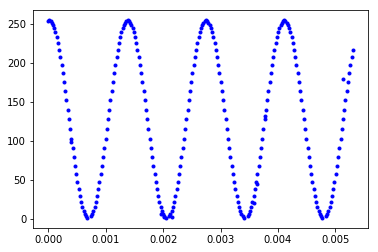

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(timestamps[:250], values[:250], "b.")